In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("logs/result_sarcos_300", sep=" ", index_col=False)

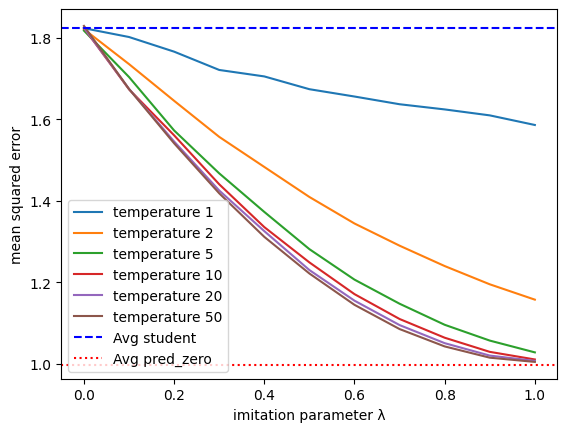

In [3]:
import matplotlib.pyplot as plt

avg_student = df.groupby(['temperature', 'delta'])['student'].mean().reset_index()

# Plotting
fig, ax = plt.subplots()

# Group by Temperature and plot
for name, group in avg_student.groupby('temperature'):
    ax.plot(group['delta'], group['student'], label=f'temperature {name}')

# Horizontal lines for the average values of 'pred_zero' and 'teacher'
avg_student = df['student'][df['delta'] == 0].mean()
avg_pred_zero = df['pred_zero'].mean()
# avg_teacher = df['teacher'].mean()

ax.axhline(y=avg_student, color='b', linestyle='--', label='Avg student')
ax.axhline(y=avg_pred_zero, color='r', linestyle=':', label='Avg pred_zero')
# ax.axhline(y=avg_teacher, color='g', linestyle='-.', label='Avg teacher')

ax.set_xlabel('imitation parameter λ')
ax.set_ylabel('mean squared error')
ax.legend()
plt.savefig(f'data/sarcos_plot_with_zeros_as_teacher.pdf')
plt.show()